In [16]:
import pandas as pd

file_path = '/content/Motor Trend Car Road Tests.xlsx'
df_mtcars = pd.read_excel(file_path)

display(df_mtcars.head())

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np

X_mt = df_mtcars.drop(columns=['model', 'mpg'])
y_mt = df_mtcars['mpg']

## Ejercicio 1.1



In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_mtcars.drop(columns=['model', 'mpg', 'qsec'])
y = df_mtcars['mpg']

model_full = LinearRegression()
model_full.fit(X, y)
r2_full = model_full.score(X, y)

print(f'Full Dataset R2 Score: {r2_full:.4f}')
print('\nCoefficients:')
coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_full.coef_})
print(coeffs)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

model_split = LinearRegression()
model_split.fit(X_train, y_train)

train_r2 = model_split.score(X_train, y_train)
test_r2 = model_split.score(X_test, y_test)
print(f'\nTrain R2 (40% split): {train_r2:.4f}')
print(f'Test R2 (60% split): {test_r2:.4f}')

alphas = [0.1, 1, 10, 100]
ridge_results = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_results.append({
        'alpha': a,
        'train_r2': ridge.score(X_train, y_train),
        'test_r2': ridge.score(X_test, y_test)
    })

ridge_df = pd.DataFrame(ridge_results)
print('\nRidge Regression Results:')
print(ridge_df)

Full Dataset R2 Score: 0.8622

Coefficients:
  Feature  Coefficient
0     cyl    -0.356207
1    disp     0.005914
2      hp    -0.022001
3    drat     0.789081
4      wt    -2.503712
5      vs     1.166746
6      am     2.020297
7    gear     0.531351
8    carb    -0.557024

Train R2 (40% split): 0.9409
Test R2 (60% split): -0.3105

Ridge Regression Results:
   alpha  train_r2   test_r2
0    0.1  0.938972  0.477461
1    1.0  0.924816  0.620678
2   10.0  0.858618  0.685626
3  100.0  0.803440  0.598711


## Regresion 'qsec'



In [5]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import pandas as pd

X_qsec = df_mtcars.drop(columns=['model', 'mpg', 'qsec'])
y_qsec = df_mtcars['qsec']

model_full_qsec = LinearRegression()
model_full_qsec.fit(X_qsec, y_qsec)
r2_full_qsec = model_full_qsec.score(X_qsec, y_qsec)

print(f'Full Dataset R2 Score (Target: qsec): {r2_full_qsec:.4f}')
print('\nCoefficients for qsec:')
coeffs_qsec = pd.DataFrame({'Feature': X_qsec.columns, 'Coefficient': model_full_qsec.coef_})
print(coeffs_qsec)

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_qsec, y_qsec, test_size=0.60, random_state=42)

model_split_qsec = LinearRegression()
model_split_qsec.fit(X_train_q, y_train_q)

train_r2_q = model_split_qsec.score(X_train_q, y_train_q)
test_r2_q = model_split_qsec.score(X_test_q, y_test_q)
print(f'\nTrain R2 (40% split): {train_r2_q:.4f}')
print(f'Test R2 (60% split): {test_r2_q:.4f}')

alphas = [0.1, 1, 10, 100]
ridge_results_qsec = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_q, y_train_q)
    ridge_results_qsec.append({
        'alpha': a,
        'train_r2': ridge.score(X_train_q, y_train_q),
        'test_r2': ridge.score(X_test_q, y_test_q)
    })

ridge_df_qsec = pd.DataFrame(ridge_results_qsec)
print('\nRidge Regression Results (Target: qsec):')
print(ridge_df_qsec)

Full Dataset R2 Score (Target: qsec): 0.8632

Coefficients for qsec:
  Feature  Coefficient
0     cyl    -0.406077
1    disp    -0.006124
2      hp    -0.004103
3    drat    -0.104132
4      wt     1.214755
5      vs     1.104607
6      am    -0.717761
7    gear    -0.258538
8    carb    -0.237119

Train R2 (40% split): 0.9771
Test R2 (60% split): -6.1568

Ridge Regression Results (Target: qsec):
   alpha  train_r2   test_r2
0    0.1  0.949753  0.752379
1    1.0  0.930111  0.701198
2   10.0  0.839444  0.535585
3  100.0  0.757597  0.429180


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_dummy = df_mtcars.copy()
df_dummy = pd.get_dummies(df_dummy, columns=['cyl', 'gear', 'carb'], drop_first=True)

X_dummy = df_dummy.drop(columns=['model', 'mpg', 'qsec'])
y_mpg_dummy = df_dummy['mpg']

model_mpg_dummy = LinearRegression()
model_mpg_dummy.fit(X_dummy, y_mpg_dummy)
r2_mpg_dummy_full = model_mpg_dummy.score(X_dummy, y_mpg_dummy)


X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_dummy, y_mpg_dummy, test_size=0.60, random_state=42)
model_mpg_split = LinearRegression()
model_mpg_split.fit(X_train_m, y_train_m)
train_r2_mpg_dummy = model_mpg_split.score(X_train_m, y_train_m)
test_r2_mpg_dummy = model_mpg_split.score(X_test_m, y_test_m)

y_qsec_dummy = df_dummy['qsec']

model_qsec_dummy = LinearRegression()
model_qsec_dummy.fit(X_dummy, y_qsec_dummy)
r2_qsec_dummy_full = model_qsec_dummy.score(X_dummy, y_qsec_dummy)

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_dummy, y_qsec_dummy, test_size=0.60, random_state=42)
model_qsec_split = LinearRegression()
model_qsec_split.fit(X_train_q, y_train_q)
train_r2_qsec_dummy = model_qsec_split.score(X_train_q, y_train_q)
test_r2_qsec_dummy = model_qsec_split.score(X_test_q, y_test_q)

print(f'MPG Dummy Model - Full R2: {r2_mpg_dummy_full:.4f}, Train R2: {train_r2_mpg_dummy:.4f}, Test R2: {test_r2_mpg_dummy:.4f}')
print(f'QSEC Dummy Model - Full R2: {r2_qsec_dummy_full:.4f}, Train R2: {train_r2_qsec_dummy:.4f}, Test R2: {test_r2_qsec_dummy:.4f}')

MPG Dummy Model - Full R2: 0.8912, Train R2: 1.0000, Test R2: -8.4636
QSEC Dummy Model - Full R2: 0.8947, Train R2: 1.0000, Test R2: -3.3096


##VISUAL


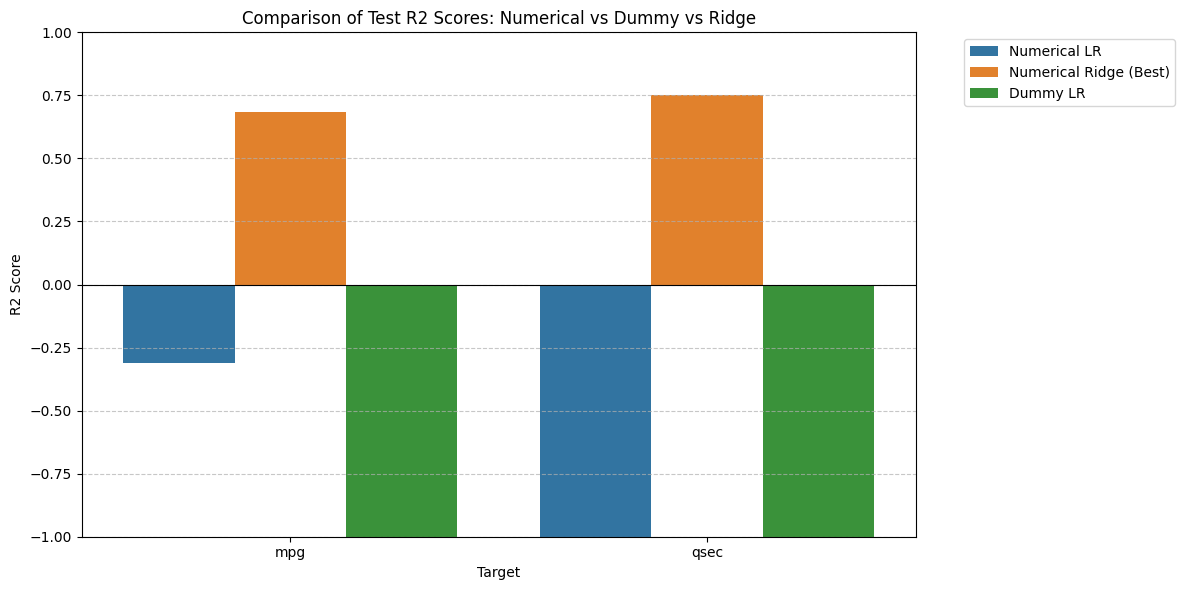

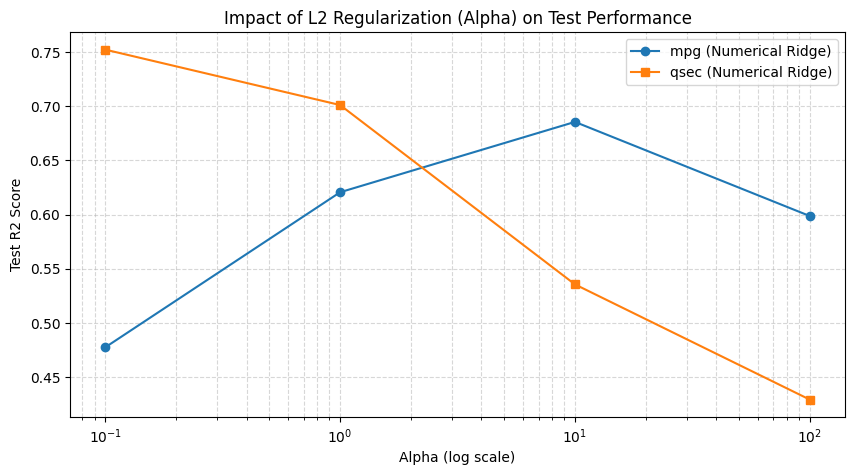

Summary DataFrame:
  Target                  Method   Test_R2
0    mpg            Numerical LR -0.310524
1    mpg  Numerical Ridge (Best)  0.685626
2    mpg                Dummy LR -8.463551
3   qsec            Numerical LR -6.156767
4   qsec  Numerical Ridge (Best)  0.752379
5   qsec                Dummy LR -3.309588


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

best_ridge_mpg = ridge_df.loc[ridge_df['test_r2'].idxmax()]
best_ridge_qsec = ridge_df_qsec.loc[ridge_df_qsec['test_r2'].idxmax()]

summary_data = {
    'Target': ['mpg', 'mpg', 'mpg', 'qsec', 'qsec', 'qsec'],
    'Method': ['Numerical LR', 'Numerical Ridge (Best)', 'Dummy LR',
               'Numerical LR', 'Numerical Ridge (Best)', 'Dummy LR'],
    'Test_R2': [test_r2, best_ridge_mpg['test_r2'], test_r2_mpg_dummy,
                test_r2_q, best_ridge_qsec['test_r2'], test_r2_qsec_dummy]
}
df_summary = pd.DataFrame(summary_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_summary, x='Target', y='Test_R2', hue='Method')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Comparison of Test R2 Scores: Numerical vs Dummy vs Ridge')
plt.ylabel('R2 Score')
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ridge_df['alpha'], ridge_df['test_r2'], marker='o', label='mpg (Numerical Ridge)')
plt.plot(ridge_df_qsec['alpha'], ridge_df_qsec['test_r2'], marker='s', label='qsec (Numerical Ridge)')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Test R2 Score')
plt.title('Impact of L2 Regularization (Alpha) on Test Performance')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

print("Summary DataFrame:")
print(df_summary)